https://www.jiqizhixin.com/articles/2019-04-25-8

# 基础

In [4]:
import collections
import os
import shutil
import tqdm
import numpy as np
import PIL.Image
import torch
import torchvision
from torch.autograd import Variable

## 张量基本信息

In [8]:
a = torch.Tensor([[1, 2], [3, 4], [5,6]])
#print(a)
print(a.type())   # Data type
print(a.size())   # Shape of the tensor. It is a subclass of Python tuple
print(a.dim())    # 维度Number of dimensions.

torch.FloatTensor
torch.Size([3, 2])
2


#### 类型转换

#### torch.Tensor 与 np.ndarray 转换

#### Tensor与numpy、cuda转换

In [9]:
a = torch.Tensor([[1, 2], [3, 4], [5,6]])
np_a = a.numpy()
torch_a = torch.from_numpy(np_a)
b = torch_a.float()

In [6]:
if torch.cuda.is_available():
    a_cuda = a.cuda()
    print(a_cuda)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0')


#### torch.Tensor 与 PIL.Image 转换

PyTorch 中的张量默认采用 N×D×H×W 的顺序，并且数据范围在 [0, 1]，需要进行转置和规范化。

#### np.ndarray 与 PIL.Image 转换

### 张量形变
张量形变常常需要用于将卷积层特征输入全连接层的情形。相比 torch.view，torch.reshape 可以自动处理输入张量不连续的情况。

#### 复制张量

有三种复制的方式，对应不同的需求。

#### 拼接张量

注意 torch.cat 和 torch.stack 的区别在于 torch.cat 沿着给定的维度拼接，而 torch.stack 会新增一维。例如当参数是 3 个 10×5 的张量，torch.cat 的结果是 30×5 的张量，而 torch.stack 的结果是 3×10×5 的张量。

## Variable

In [9]:
a = torch.Tensor([[1, 2], [3, 4], [5,6]])
Variable(a)
a

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

标量求导

In [10]:
x = Variable(torch.Tensor([3]), requires_grad = True)
w = Variable(torch.Tensor([4]), requires_grad = True)
b = Variable(torch.Tensor([5]), requires_grad = True)
y = w * x + b
y.backward()#表示自动求导y.backward()(torch.FloatTensor([1]))，因为标量求导里面的参数可以不用写
print (x.grad, w.grad, b.grad)

tensor([4.]) tensor([3.]) tensor([1.])


矩阵求导

## Dataset

In [35]:
dataiter = DataLoader(myDataset, batch_size = 32, shuffle = True, collate_fn = default_collate)

NameError: name 'DataLoader' is not defined

## nn.Module（模组）

### 模型模板

In [ ]:
class net_name (nn.Module):
    def __init__ (self, other_arguments):
        super(net_name, self). __init__ ()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size)
        # other network layer
        
    def forward (self, x):
        x = self.conv1(x)
        return x

### 损失函数

In [ ]:
cirtirion = nn.CrossEntropyLoss()
loss = criterion (output, target)

## torch.optim（优化）

In [ ]:
#学习率0.01，动量0.9的随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

## 模型保存和加载

### 整个模型

#### 保存整个模型

In [ ]:
# 读取保存的模型
seq_net1 = torch.load('./model.pth')

In [ ]:
seq_net1

In [ ]:
print(seq_net1[0].weight)

In [ ]:
torch.save(net1,'net.pkl')  #保存整个网络

In [ ]:
net2 = torch.load('net.pkl')
prediction = net2(x)
print (prediction)

### 保存模型的参数

In [ ]:
# 保存模型参数
torch.save(model.state_dict(), 'save_model_params.pth')

通过上面的方式，我们保存了模型的参数，如果要重新读入模型的参数，首先我们需要重新定义一次模型，接着重新读入参数

In [ ]:
model2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

model2.load_state_dict(torch.load('save_model_params.pth'))

In [ ]:
model2

In [ ]:
print(model2[0].weight)

In [ ]:
torch.save(net1.state_dict(),'net_params.pkl')  #只保存网络中的参数，速度快，内存少

### 加载模型的参数

In [ ]:
#提取网络，针对保存方法2
net3 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1))
 
net3.load_state_dict(torch.load('net_params.pkl'))
#prediction = net3(x)

https://blog.csdn.net/nanxiaoting/article/list/2?t=1&

In [18]:
import torch
import numpy as np

In [4]:
numpy_data = np.arange(15).reshape(3,5)
print ('numpy_data\n',numpy_data)
torch_data = torch.from_numpy(numpy_data)
print ('torch_data\n',torch_data)
numpy_data1 = torch_data.numpy()
print ('numpy_data1\n',numpy_data1)

numpy_data
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
torch_data
 tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]], dtype=torch.int32)
numpy_data1
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


## 构建torch矩阵

In [5]:
data = torch.Tensor(3,5)   #构建一个3×5未初始化的矩阵
print (data)
 
data1 = torch.rand(5,3)    #构建一个随机初始化的矩阵
print (data1)
print (data1.size())

tensor([[9.9184e-39, 9.0000e-39, 1.0561e-38, 1.0653e-38, 4.1327e-39],
        [8.9082e-39, 9.8265e-39, 9.4592e-39, 1.0561e-38, 1.0653e-38],
        [1.0469e-38, 9.5510e-39, 1.0102e-38, 8.4490e-39, 1.0653e-38]])
tensor([[0.0799, 0.3616, 0.9739],
        [0.2280, 0.6707, 0.9384],
        [0.3383, 0.6736, 0.2419],
        [0.1628, 0.8922, 0.5902],
        [0.1464, 0.9181, 0.8001]])
torch.Size([5, 3])


## 加法运算

In [8]:
x = torch.rand(5,3)
y = torch.rand(5,3)
 
print ('1\n', x + y)
print ('2\n', torch.add(x,y))

#提供一个输出作为参数
result = torch.Tensor(5,3)
torch.add(x,y,out=result)
print ('3\n', result)
 
#就地操作
y.add_(x)
print ('4\n', y)

1
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])
2
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])
3
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])
4
 tensor([[1.4765, 1.2106, 1.2076],
        [1.7050, 1.0308, 1.0145],
        [1.0036, 1.3928, 1.3611],
        [1.1624, 0.5930, 0.9226],
        [1.1395, 1.2307, 0.9401]])


## 切片以及view方法

In [17]:
numpy_data = np.arange(16).reshape(4,4)
x = torch.from_numpy(numpy_data)

print ('----x\n', x)
print ('----x[:,1]\n', x[:,1])  #索引操作
y = x.view(16)
print ('----x.view(16)\n', y)
z = x.view(-1,8)   #2*8
print ('----x.view(-1,8)\n', z)

----x
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]], dtype=torch.int32)
----x[:,1]
 tensor([ 1,  5,  9, 13], dtype=torch.int32)
----x.view(16)
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=torch.int32)
----x.view(-1,8)
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]], dtype=torch.int32)


创建tensor

In [18]:
x = torch.rand(4,4)
print (torch.is_tensor(x))   #返回True
print (torch.numel(x))     #返回16


#1.对角元素为1
y = torch.eye(3,4)   #对角元素为1，其余为0
print (y)
 
#2.从numpy.ndarray类创造一个tensor类
a = np.array([1,2,3])
t = torch.from_numpy(a)
print (t)
t[0] = -1
print (a)   #[-1  2  3],注意这种创造方式tensor 和ndarray共享相同的内存
 
#3.利用torch.linspace
b = torch.linspace(2,10,steps=10)  #注意step是start 和end 之间的样本数
print (b)
 
#4.torch.logspace() 返回10^start和10^end之间的对数间隔
c = torch.logspace(0.1,1.0,steps=5)
print (c)
 
#5.填充1
d = torch.ones(4,4)
print (d)
 
#6.torch.arange()
e = torch.arange(1,4)  #默认step = 1
print (e)
 
#7.torch.zeros()
f = torch.zeros(6)
print (f)
g = torch.zeros(2,3)
print (g)

True
16
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])
tensor([1, 2, 3], dtype=torch.int32)
[-1  2  3]
tensor([ 2.0000,  2.8889,  3.7778,  4.6667,  5.5556,  6.4444,  7.3333,  8.2222,
         9.1111, 10.0000])
tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1, 2, 3])
tensor([0., 0., 0., 0., 0., 0.])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 索引、切片、连接、换位

In [23]:
x = torch.randn(2,3)
print('x\n', x)
 
y = torch.cat((x,x),0) #竖着摞在一起
print ('y\n', y)
 
z = torch.cat((x,x),1)  #横着落在一起
print ('z\n', z)
 
#chunk在给定维度上将张量进行分块处理。chunks：要返回的分块的个数
g = torch.chunk(x,2,1)
print (g)
 
print ('--'*20)
#split 将输入张量分割成相同size的chunks。如果不能整分，则最后一块小于其他块
w = torch.split(z,3,dim=1)  #3:代表每个分块大小为3
print (w)
 
#stack沿着一个新的维度对输入张量进行连接
f = torch.stack((x,x),dim=0)
print (f)
 
#转置
e = torch.t(x)
print (e)

x
 tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]])
y
 tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888],
        [ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]])
z
 tensor([[ 0.3068,  2.6857, -1.8967,  0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888,  2.1063,  0.9491,  1.0888]])
(tensor([[0.3068, 2.6857],
        [2.1063, 0.9491]]), tensor([[-1.8967],
        [ 1.0888]]))
----------------------------------------
(tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]]), tensor([[ 0.3068,  2.6857, -1.8967],
        [ 2.1063,  0.9491,  1.0888]]))
tensor([[[ 0.3068,  2.6857, -1.8967],
         [ 2.1063,  0.9491,  1.0888]],

        [[ 0.3068,  2.6857, -1.8967],
         [ 2.1063,  0.9491,  1.0888]]])
tensor([[ 0.3068,  2.1063],
        [ 2.6857,  0.9491],
        [-1.8967,  1.0888]])


# 数据处理

## 数据预处理

实际处理中，中心化和标准化都特别重要，但PCA和白噪声在卷积网络中基本不使用，因为卷积网络可以自动学习如何提取这些特征而不需要人工干预。

### 中心化

每个特征维度减去相应均值使得数据均值为0

### 标准化

1、除以标准差，新数据分布接近标准高斯分布

2、每个特征维度的最大最小值按比例缩放到-1~1

### PCA主成分分析

### 白噪声

## 权重初始化

实际中批标准化成为神经网络的标准技术

In [1]:
全0初始化

NameError: name '全0初始化' is not defined

### 随机初始化

### 稀疏初始化

### 初始化偏置（bias）

### 批标准化（Batch Normalization）

对于每一层网络的输出，对其做一个归一化，使其服从标准的正态分布，这样后一层网络的输入也是一个标准的正态分布，所以能够比较好的进行训练，加快收敛速度。

batch normalization 的实现非常简单，对于给定的一个 batch 的数据 $B = \{x_1, x_2, \cdots, x_m\}$算法的公式如下

$$
\mu_B = \frac{1}{m} \sum_{i=1}^m x_i
$$
$$
\sigma^2_B = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2
$$
$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma^2_B + \epsilon}}
$$
$$
y_i = \gamma \hat{x}_i + \beta
$$

第一行和第二行是计算出一个 batch 中数据的均值和方差，接着使用第三个公式对 batch 中的每个数据点做标准化， 𝜖  是为了计算稳定引入的一个小的常数，通常取  10−5 ，最后利用权重修正得到最后的输出结果。

测试的时候不能用测试的数据集去算均值和方差，而是用训练的时候算出的移动平均均值和方差去代替

pytorch 内置了批标准化的函数，一维和二维分别是 `torch.nn.BatchNorm1d()` 和 `torch.nn.BatchNorm2d()`

pytorch 不仅将 $\gamma$ 和 $\beta$ 作为训练的参数，也将 `moving_mean` 和 `moving_var` 也作为参数进行训练

In [ ]:
def data_tf(x):
    x = np.array(x, dtype='float32') / 255
    x = (x - 0.5) / 0.5 # 数据预处理，标准化
    x = torch.from_numpy(x)
    x = x.unsqueeze(0)
    return x

train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True) # 重新载入数据集，申明定义的数据变换
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

In [78]:
# 使用批标准化
class conv_bn_net(nn.Module):
    def __init__(self):
        super(conv_bn_net, self).__init__()
        self.stage1 = nn.Sequential(
            nn.Conv2d(1, 6, 3, padding=1),
            nn.BatchNorm2d(6),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )
        
        self.classfy = nn.Linear(400, 10)
    def forward(self, x):
        x = self.stage1(x)
        x = x.view(x.shape[0], -1)
        x = self.classfy(x)
        return x

net = conv_bn_net()
optimizer = torch.optim.SGD(net.parameters(), 1e-1) # 使用随机梯度下降，学习率 0.1

In [79]:
train(net, train_data, test_data, 5, optimizer, criterion)

Epoch 0. Train Loss: 0.160329, Train Acc: 0.952842, Valid Loss: 0.063328, Valid Acc: 0.978441, Time 00:00:33
Epoch 1. Train Loss: 0.067862, Train Acc: 0.979361, Valid Loss: 0.068229, Valid Acc: 0.979430, Time 00:00:37
Epoch 2. Train Loss: 0.051867, Train Acc: 0.984625, Valid Loss: 0.044616, Valid Acc: 0.985265, Time 00:00:37
Epoch 3. Train Loss: 0.044797, Train Acc: 0.986141, Valid Loss: 0.042711, Valid Acc: 0.986056, Time 00:00:38
Epoch 4. Train Loss: 0.039876, Train Acc: 0.987690, Valid Loss: 0.042499, Valid Acc: 0.985067, Time 00:00:41


In [76]:
# 不使用批标准化
class conv_no_bn_net(nn.Module):
    def __init__(self):
        super(conv_no_bn_net, self).__init__()
        self.stage1 = nn.Sequential(
            nn.Conv2d(1, 6, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )
        
        self.classfy = nn.Linear(400, 10)
    def forward(self, x):
        x = self.stage1(x)
        x = x.view(x.shape[0], -1)
        x = self.classfy(x)
        return x

net = conv_no_bn_net()
optimizer = torch.optim.SGD(net.parameters(), 1e-1) # 使用随机梯度下降，学习率 0.1    

In [77]:
train(net, train_data, test_data, 5, optimizer, criterion)

Epoch 0. Train Loss: 0.211075, Train Acc: 0.935934, Valid Loss: 0.062950, Valid Acc: 0.980123, Time 00:00:27
Epoch 1. Train Loss: 0.066763, Train Acc: 0.978778, Valid Loss: 0.050143, Valid Acc: 0.984375, Time 00:00:29
Epoch 2. Train Loss: 0.050870, Train Acc: 0.984292, Valid Loss: 0.039761, Valid Acc: 0.988034, Time 00:00:29
Epoch 3. Train Loss: 0.041476, Train Acc: 0.986924, Valid Loss: 0.041925, Valid Acc: 0.986155, Time 00:00:29
Epoch 4. Train Loss: 0.036118, Train Acc: 0.988523, Valid Loss: 0.042703, Valid Acc: 0.986452, Time 00:00:29


## 防止过拟合

实际中一般采用全局权重的L2正则化搭配Dropout来防止过拟合

### 正则化

### Dropout

## 使用 NumPy 初始化

torch.nn.init 为我们提供了内置初始化方式，避免了我们重复操作

下面讲了两种初始化方式，其实它们的本质都是一样的，就是去修改某一层参数的实际值，而 torch.nn.init 提供了更多成熟的深度学习相关的初始化方式，非常方便

In [2]:
import numpy as np
import torch
from torch import nn

### Sequential参数初始化

In [3]:
# 定义一个 Sequential 模型
net1 = nn.Sequential(
    nn.Linear(30, 40),
    nn.ReLU(),
    nn.Linear(40, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

In [4]:
# 访问第一层的参数
w1 = net1[0].weight
b1 = net1[0].bias
w1

Parameter containing:
tensor([[-0.0869, -0.0077, -0.0584,  ...,  0.0793, -0.1387, -0.0937],
        [ 0.1188,  0.0512, -0.0676,  ..., -0.1355,  0.0262,  0.0547],
        [ 0.0678,  0.1498, -0.1514,  ...,  0.0860, -0.0752, -0.0373],
        ...,
        [ 0.1166,  0.1585,  0.0192,  ...,  0.0802, -0.0479,  0.0788],
        [-0.0337,  0.1206, -0.1406,  ...,  0.1629,  0.0779,  0.0134],
        [ 0.1204, -0.1461, -0.0549,  ..., -0.1402,  0.1553, -0.0772]],
       requires_grad=True)

注意，这是一个 Parameter，也就是一个特殊的 Variable，我们可以访问其 .data属性得到其中的数据，然后直接定义一个新的 Tensor 对其进行替换，我们可以使用 PyTorch 中的一些随机数据生成的方式，比如 torch.randn，如果要使用更多 PyTorch 中没有的随机化方式，可以使用 numpy

In [5]:
# 定义一个 Tensor 直接对其进行替换
net1[0].weight.data = torch.from_numpy(np.random.uniform(3, 5, size=(40, 30)))

In [6]:
print(net1[0].weight)

Parameter containing:
tensor([[3.6173, 3.4983, 3.0213,  ..., 3.2497, 4.0822, 4.0790],
        [4.2130, 4.1288, 3.5580,  ..., 3.7847, 3.4333, 4.0782],
        [4.1682, 4.4227, 4.0554,  ..., 3.4270, 4.6582, 3.3446],
        ...,
        [3.0123, 4.8735, 4.0849,  ..., 4.0020, 4.0468, 4.3241],
        [3.4627, 3.7257, 4.4525,  ..., 3.7062, 3.7227, 4.8545],
        [4.1194, 4.9413, 3.0251,  ..., 4.7536, 3.2369, 4.4822]],
       dtype=torch.float64, requires_grad=True)


更多的时候是模型中相同类型的层都需要初始化成相同的方式，这个时候一种更高效的方式是使用循环去访问，比如

In [7]:
for layer in net1:
    if isinstance(layer, nn.Linear): # 判断是否是线性层
        param_shape = layer.weight.shape
        layer.weight.data = torch.from_numpy(np.random.normal(0, 0.5, size=param_shape)) 
        # 定义为均值为 0，方差为 0.5 的正态分布

### Module 参数初始化

想对其中的某层进行初始化，可以直接像 Sequential 一样对其 Tensor 进行重新定义，其唯一不同的地方在于，如果要用循环的方式访问，需要介绍两个属性，children 和 modules

In [8]:
class sim_net(nn.Module):
    def __init__(self):
        super(sim_net, self).__init__()
        self.l1 = nn.Sequential(
            nn.Linear(30, 40),
            nn.ReLU()
        )
        
        self.l1[0].weight.data = torch.randn(40, 30) # 直接对某一层初始化
        
        self.l2 = nn.Sequential(
            nn.Linear(40, 50),
            nn.ReLU()
        )
        
        self.l3 = nn.Sequential(
            nn.Linear(50, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.l1(x)
        x =self.l2(x)
        x = self.l3(x)
        return x

In [9]:
net2 = sim_net()

In [10]:
# 访问 children
for i in net2.children():
    print(i)

Sequential(
  (0): Linear(in_features=30, out_features=40, bias=True)
  (1): ReLU()
)
Sequential(
  (0): Linear(in_features=40, out_features=50, bias=True)
  (1): ReLU()
)
Sequential(
  (0): Linear(in_features=50, out_features=10, bias=True)
  (1): ReLU()
)


In [11]:
# 访问 modules
for i in net2.modules():
    print(i)

sim_net(
  (l1): Sequential(
    (0): Linear(in_features=30, out_features=40, bias=True)
    (1): ReLU()
  )
  (l2): Sequential(
    (0): Linear(in_features=40, out_features=50, bias=True)
    (1): ReLU()
  )
  (l3): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): ReLU()
  )
)
Sequential(
  (0): Linear(in_features=30, out_features=40, bias=True)
  (1): ReLU()
)
Linear(in_features=30, out_features=40, bias=True)
ReLU()
Sequential(
  (0): Linear(in_features=40, out_features=50, bias=True)
  (1): ReLU()
)
Linear(in_features=40, out_features=50, bias=True)
ReLU()
Sequential(
  (0): Linear(in_features=50, out_features=10, bias=True)
  (1): ReLU()
)
Linear(in_features=50, out_features=10, bias=True)
ReLU()


通过上面的例子，看到区别了吗?

children 只会访问到模型定义中的第一层，因为上面的模型中定义了三个 Sequential，所以只会访问到三个 Sequential，而 modules 会访问到最后的结构，比如上面的例子，modules 不仅访问到了 Sequential，也访问到了 Sequential 里面，这就对我们做初始化非常方便，比如下面实现了和 Sequential 相同的初始化，同样非常简便

In [12]:
for layer in net2.modules():
    if isinstance(layer, nn.Linear):
        param_shape = layer.weight.shape
        layer.weight.data = torch.from_numpy(np.random.normal(0, 0.5, size=param_shape))

### torch.nn.init参数初始化

PyTorch 提供了初始化函数torch.nn.init快速进行初始化，其操作层面仍然在 Tensor 上

In [13]:
from torch.nn import init

In [14]:
print(net1[0].weight)

Parameter containing:
tensor([[-1.4591e-01,  1.9285e-01,  4.3521e-01,  ...,  3.1684e-01,
         -9.6612e-02,  8.8156e-01],
        [-4.9852e-01, -5.3198e-01, -5.6005e-01,  ...,  2.5837e-01,
         -3.9237e-01,  1.8093e-03],
        [ 7.8526e-01, -2.3523e-03, -1.0109e+00,  ...,  6.6276e-01,
          1.7446e-01, -5.2263e-01],
        ...,
        [ 5.7856e-01,  1.2365e-01,  2.8195e-01,  ...,  1.4761e-01,
         -4.6404e-01,  4.5536e-01],
        [ 4.8050e-02, -4.5689e-04, -2.8586e-01,  ...,  7.9811e-01,
          2.2383e-01,  2.6738e-02],
        [ 1.2023e-01,  1.3496e-01,  4.3054e-01,  ...,  3.8879e-01,
         -3.0993e-01, -8.6192e-01]], dtype=torch.float64, requires_grad=True)


In [16]:
# 这就是上面我们讲过的 Xavier 初始化方法，PyTorch 直接内置了其实现
init.xavier_uniform_(net1[0].weight) 

Parameter containing:
tensor([[ 0.1494, -0.1835,  0.1320,  ..., -0.1753,  0.1139,  0.2134],
        [ 0.1182, -0.0571, -0.1515,  ..., -0.0477,  0.2100, -0.2751],
        [ 0.1730, -0.2923,  0.2351,  ...,  0.1369,  0.1127,  0.1087],
        ...,
        [-0.2393, -0.0380, -0.2560,  ..., -0.1076, -0.2196,  0.1244],
        [-0.0615,  0.0709, -0.2567,  ...,  0.0161, -0.0940,  0.0767],
        [ 0.1703, -0.1214, -0.2307,  ...,  0.1397, -0.0313, -0.0307]],
       dtype=torch.float64, requires_grad=True)

In [19]:
# 可以看到参数已经被修改了
print(net1[0].weight)

Parameter containing:
tensor([[ 0.1494, -0.1835,  0.1320,  ..., -0.1753,  0.1139,  0.2134],
        [ 0.1182, -0.0571, -0.1515,  ..., -0.0477,  0.2100, -0.2751],
        [ 0.1730, -0.2923,  0.2351,  ...,  0.1369,  0.1127,  0.1087],
        ...,
        [-0.2393, -0.0380, -0.2560,  ..., -0.1076, -0.2196,  0.1244],
        [-0.0615,  0.0709, -0.2567,  ...,  0.0161, -0.0940,  0.0767],
        [ 0.1703, -0.1214, -0.2307,  ...,  0.1397, -0.0313, -0.0307]],
       dtype=torch.float64, requires_grad=True)


# 数据增强
单单只靠网络并不能取得 state-of-the-art 的结果，现实问题往往更加复杂，非常容易出现过拟合的问题，而数据增强是对抗过拟合问题的一个重要方法。

因为有了图片增强，训练的数据集比实际数据集多了很多'新'样本，减少了过拟合的问题。

## 常用的数据增强方法
常用的数据增强方法如下：  
1.对图片进行一定比例缩放  
2.对图片进行随机位置的截取   
3.对图片进行随机的水平和竖直翻转  
4.对图片进行随机角度的旋转  
5.对图片进行亮度、对比度和颜色的随机变化

这些方法 pytorch 都已经为我们内置在了 torchvision 里面，我们在安装 pytorch 的时候也安装了 torchvision，下面我们来依次展示一下这些数据增强方法

In [8]:
import sys
sys.path.append('..')

from PIL import Image
from torchvision import transforms as tfs

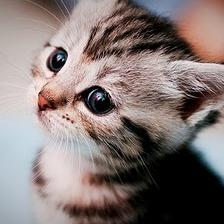

In [10]:
# 读入一张图片
im = Image.open('./cat.png')
im

### 随机比例放缩torchvision.transforms.Resize()

 `torchvision.transforms.Resize()` 函数[文档](http://pytorch.org/docs/0.3.0/torchvision/transforms.html)
 
 第一个参数可以是一个整数，那么图片会将保持宽高比的将短边缩放到这个值，第一个参数也可以是一个 tuple，那么图片会直接把宽和高缩放到这个大小；
 
 第二个参数表示放缩图片使用的方法，比如最邻近法，或者双线性差值等，一般双线性差值能够保留图片更多的信息，所以 pytorch 默认使用的是双线性差值

before scale, shape: (224, 224)
after scale, shape: (200, 100)


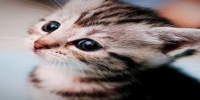

In [13]:
# 比例缩放
print('before scale, shape: {}'.format(im.size))
new_im = tfs.Resize((100, 200))(im)
print('after scale, shape: {}'.format(new_im.size))
new_im

### 随机位置截取torchvision.transforms.RandomCrop()和torchvision.transforms.CenterCrop()

随机位置截取能够提取出图片中局部的信息，使得网络接受的输入具有多尺度的特征，所以能够有较好的效果。在 torchvision 中主要有下面两种方式：

 `torchvision.transforms.RandomCrop()`，传入希望截取出的图片的长和宽，对图片在随机位置截取；
 
 `torchvision.transforms.CenterCrop()`，传入希望截取出的图片大小作为，在图片中心截取

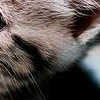

In [18]:
# 随机裁剪出 100 x 100 的区域
random_im1 = tfs.RandomCrop(100)(im)
random_im1

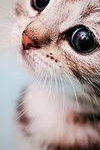

In [5]:
# 随机裁剪出 150 x 100 的区域
random_im2 = tfs.RandomCrop((150, 100))(im)
random_im2

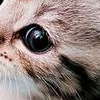

In [6]:
# 中心裁剪出 100 x 100 的区域
center_im = tfs.CenterCrop(100)(im)
center_im

### 随机的水平和竖直方向翻转 torchvision.transforms.RandomHorizontalFlip()和torchvision.transforms.RandomVerticalFlip()

随机翻转也是一种非常有效的手段。

torchvision 中，随机翻转使用的是 `torchvision.transforms.RandomHorizontalFlip()` 和 `torchvision.transforms.RandomVerticalFlip()`

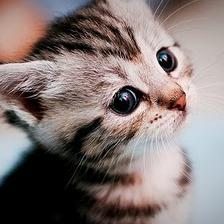

In [12]:
# 随机水平翻转
h_filp = tfs.RandomHorizontalFlip()(im)
h_filp

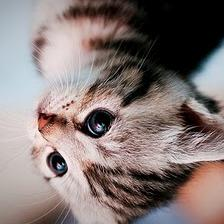

In [13]:
# 随机竖直翻转
v_flip = tfs.RandomVerticalFlip()(im)
v_flip

### 随机角度旋转torchvision.transforms.RandomRotation()

 `torchvision.transforms.RandomRotation()` 中第一个参数就是随机旋转的角度，比如填入 10，那么每次图片就会在 -10 ~ 10 度之间随机旋转

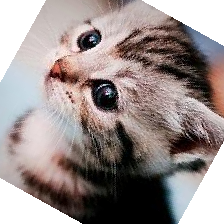

In [18]:
rot_im = tfs.RandomRotation(45)(im)
rot_im

### 亮度、对比度和颜色的变化torchvision.transforms.ColorJitter()

可以设置亮度变化，对比度变化和颜色变化等

`torchvision.transforms.ColorJitter()` 第一个参数就是亮度的比例，第二个是对比度，第三个是饱和度，第四个是颜色

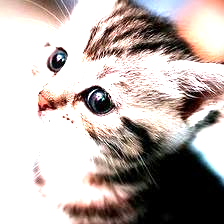

In [19]:
# 亮度
bright_im = tfs.ColorJitter(brightness=1)(im) # 随机从 0 ~ 2 之间亮度变化，1 表示原图
bright_im

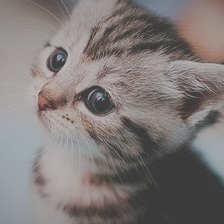

In [20]:
# 对比度
contrast_im = tfs.ColorJitter(contrast=1)(im) # 随机从 0 ~ 2 之间对比度变化，1 表示原图
contrast_im

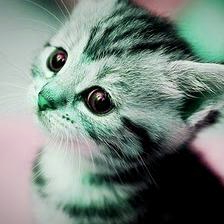

In [22]:
# 颜色
color_im = tfs.ColorJitter(hue=0.5)(im) # 随机从 -0.5 ~ 0.5 之间对颜色变化
color_im

### 组合变换增强torchvision.transforms.Compose()

这些图片增强的方法可以联合起来用，torchvision 里面 `torchvision.transforms.Compose()`能够将这些变化合起来

In [23]:
im_aug = tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

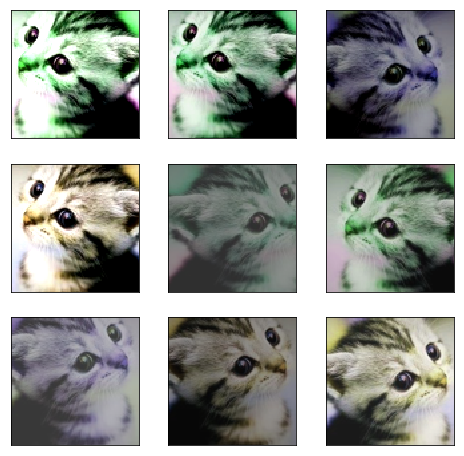

In [25]:
nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

可以看到每次做完增强之后的图片都有一些变化，所以这就是我们前面讲的，增加了一些'新'数据

下面我们使用图像增强进行训练网络，看看具体的提升究竟在什么地方，使用前面讲的 ResNet 进行训练 

# 卷积模块

## 卷积层

卷积在 pytorch 中有两种方式，一种是 `torch.nn.Conv2d()`，一种是 `torch.nn.functional.conv2d()`，两种形式本质都是使用一个卷积操作

这两种形式的卷积对于输入的要求都是一样的，首先需要输入是一个 `torch.autograd.Variable()` 的类型，大小是 (batch, channel, H, W)，其中 batch 表示输入的一批数据的数目，第二个是输入的通道数，一般一张彩色的图片是 3，灰度图是 1，而卷积网络过程中的通道数比较大，会出现几十到几百的通道数，H 和 W 表示输入图片的高度和宽度。

比如一个 batch 是 32 张图片，每张图片是 3 通道，高和宽分别是 50 和 100，那么输入的大小就是 (32, 3, 50, 100)

In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Conv2d()内部含义

nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias, groups, dilation)

`in_channels`：输入数据体深度

`out_channels`：输出数据体深度

`kernel_size`：滤波器（卷积核）大小。kernel_size = 3表示宽高相同，kernel_size = (3 ,2)表示宽高不同卷积核

`stride`：滑动步长

`padding`：填充。padding = 0表四周不进行零填充，padding = 1表示四周进行1个像素点的零填充

bias：使用偏置，默认bias =True

groups：输出数据体深度和输入数据体深度上的联系，默认groups = 1，即所有输入输出相关联；如果 = 2表示输入深度被分割成两份，输出深度也被分割成两份，它们分别对应。所以要求输入输出都能被group整除

dilation：卷积对于输入数据体的空间间隔，默认dilation = 1

### 例子

### 读入图片并转化为矩阵

In [2]:
im = Image.open('./cat.png').convert('L') # 读入一张灰度图的图片
im = np.array(im, dtype='float32') # 将其转换为一个矩阵

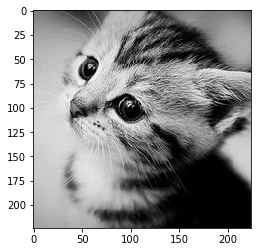

In [3]:
# 可视化图片
plt.imshow(im.astype('uint8'), cmap='gray')

### 图片矩阵转为tensor，并适配卷积输入的要求

In [4]:
# 将图片矩阵转化为 pytorch tensor，并适配卷积输入的要求
im = torch.from_numpy(im.reshape((1, 1, im.shape[0], im.shape[1]))) 

### 定义算子进行轮廓检测

#### 使用 nn.Conv2d

**实际使用中我们基本都使用 `nn.Conv2d()` 这种形式**

In [18]:
# 使用 nn.Conv2d
conv1 = nn.Conv2d(1, 1, 3, bias=False) # 定义卷积

sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3)) # 适配卷积的输入输出
conv1.weight.data = torch.from_numpy(sobel_kernel) # 给卷积的 kernel 赋值

edge1 = conv1(Variable(im)) # 作用在图片上
edge1 = edge1.data.squeeze().numpy() # 将输出转换为图片的格式

下面我们可视化边缘检测之后的结果

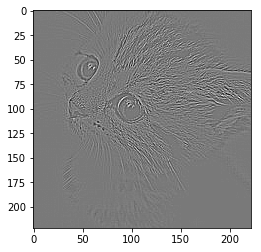

In [19]:
plt.imshow(edge1, cmap='gray')

#### 使用 F.conv2d

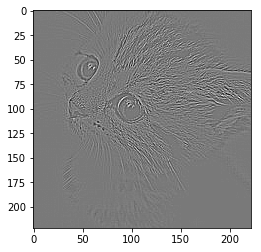

In [23]:
# 使用 F.conv2d
sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3)) # 适配卷积的输入输出
weight = Variable(torch.from_numpy(sobel_kernel))

edge2 = F.conv2d(Variable(im), weight) # 作用在图片上
edge2 = edge2.data.squeeze().numpy() # 将输出转换为图片的格式
plt.imshow(edge2, cmap='gray')

两种形式能够得到相同的效果。

使用 `nn.Conv2d()` 相当于直接定义了一层卷积网络结构，而使用 `torch.nn.functional.conv2d()` 相当于定义了一个卷积的操作，所以使用后者需要再额外去定义一个 weight，而且这个 weight 也必须是一个 Variable，而使用 `nn.Conv2d()` 则会帮我们默认定义一个随机初始化的 weight，如果我们需要修改，那么取出其中的值对其修改，如果不想修改，那么可以直接使用这个默认初始化的值，非常方便

**实际使用中我们基本都使用 `nn.Conv2d()` 这种形式**

## 池化层
图片变小了还是能够看出内容，而池化层能够将图片大小降低，提高了计算效率，同时池化层也没有参数。池化的方式有很多种：最大值池化，均值池化等等，在卷积网络中一般使用最大值池化。

在 pytorch 中最大值池化的方式也有两种，一种是 `nn.MaxPool2d()`，一种是 `torch.nn.functional.max_pool2d()`，他们对于图片的输入要求跟卷积对于图片的输入要求一样

**跟卷积层一样，实际使用中，我们一般使用 `nn.MaxPool2d()`**

### 常用池化层及含义

nn.MaxPool2d(kernel_size, stride, padding, dilation, return_indices, ceil_mode)

`kernel_size`：滤波器（卷积核）大小。kernel_size = 3表示宽高相同，kernel_size = (3 ,2)表示宽高不同卷积核

`stride`：滑动步长

`padding`：填充。padding = 0表四周不进行零填充，padding = 1表示四周进行1个像素点的零填充

dilation：卷积对于输入数据体的空间间隔，默认dilation = 1

return_indices：是否返回最大值所处的下标，默认return_indices = False

ceil_mode：表示使用一些放个代替层结构，默认 ceil_mode = False

In [ ]:
nn.MaxPool2d(kernel_size, stride, padding, dilation, return_indices, ceil_mode, count_include_pad)

count_include_pad：计算均值时是否包含零填充，默认 = True

#### 使用 nn.MaxPool2d

In [27]:
pool1 = nn.MaxPool2d(2, 2)
print('before max pool, image shape: {} x {}'.format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape: {} x {} '.format(small_im1.shape[0], small_im1.shape[1]))

before max pool, image shape: 224 x 224
after max pool, image shape: 112 x 112 


可以看到图片的大小减小了一半，内容几乎没有变化，说明池化层只是减小了图片的尺寸，并不会影响图片的内容

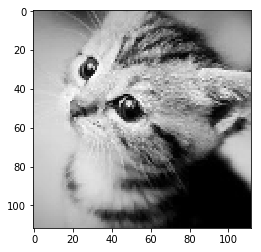

In [29]:
plt.imshow(small_im1, cmap='gray')

#### 使用F.max_pool2d

before max pool, image shape: 224 x 224
after max pool, image shape: 112 x 112 


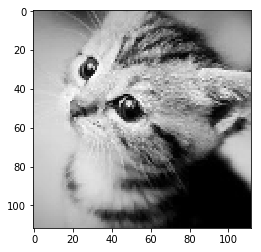

In [30]:
print('before max pool, image shape: {} x {}'.format(im.shape[2], im.shape[3]))
small_im2 = F.max_pool2d(Variable(im), 2, 2)
small_im2 = small_im2.data.squeeze().numpy()
print('after max pool, image shape: {} x {} '.format(small_im1.shape[0], small_im1.shape[1]))
plt.imshow(small_im2, cmap='gray')

# 自动微分

In [2]:
from torch.autograd import Variable

In [5]:
x = Variable(torch.ones(2,2),requires_grad=True)
print (x)
 
y = x + 2
print (y)
 
z = y*y*3
print (z)
 
out = z.mean()
print (out)
 
out.backward()
print (x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# lenet-5

In [10]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 建立了两个卷积层，第一层1 个通道输入, 6个输出通道, 5x5 卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #三个全连接层，y = Wx + b 这里没有做激活/非线性操作
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x): #2D卷积层的输入data维数是 batchsize*channel*height*width
        # 最大池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
 
net =Net()
print (net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
#网络的可学习参数通过net.parameters()返回
params = list(net.parameters())
print (len(params))
print (params[0].size())
 
input = Variable(torch.randn(1,1,32,32))
print ('input\n', input)
out = net(input)
print ('out\n', out)

10
torch.Size([6, 1, 5, 5])
input
 tensor([[[[-1.1598,  0.4353, -1.6216,  ...,  0.3026, -0.9534,  0.4917],
          [ 0.8890,  0.1429, -0.7760,  ..., -0.8602, -0.8688,  0.2656],
          [-0.7467, -0.6472,  0.0127,  ..., -0.8758,  1.4264, -0.7566],
          ...,
          [ 0.2706,  0.2323, -0.5308,  ..., -2.4984,  1.4747,  0.8925],
          [ 0.1134, -0.4392, -0.5797,  ...,  1.7504,  0.6505, -1.5175],
          [ 1.0208,  0.3804, -2.0117,  ...,  0.5702,  0.7984,  1.2758]]]])
out
 tensor([[-0.0980,  0.1168,  0.0109,  0.1165,  0.0606,  0.0732, -0.1705,  0.0735,
          0.0984,  0.0392]], grad_fn=<AddmmBackward>)


In [12]:

 
#将网络中所有的参数梯度清零
net.zero_grad()
out.backward(torch.randn(1,10))
 
#损失函数
output = net(input)
target = Variable(torch.arange(1,11))
criterion = nn.MSELoss()
 
loss = criterion(output,target)
print ('---' * 10)
print ('loss:\n',loss)
 
#反向传播
net.zero_grad() #将之前的梯度清零
print ('net.conv1.bias.grad brfore backward:')
print (net.conv1.bias.grad)
 
loss.backward()
print ('net.conv1.bias.grad after backward:')
print (net.conv1.bias.grad)
 
 
import  torch.optim as optim
 
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(),lr = 0.01)
optimizer.zero_grad()
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step() #更新参数

10
torch.Size([6, 1, 5, 5])
tensor([[[[ 2.1070,  0.8567, -1.4946,  ...,  0.9168, -0.9718, -1.0974],
          [ 1.1842, -0.5988, -0.5353,  ..., -0.7818,  0.1262, -0.5777],
          [-0.1366,  0.1679, -2.0917,  ..., -0.7635, -0.3512, -0.9805],
          ...,
          [ 0.8270, -1.6988, -0.3970,  ...,  0.4517,  1.1553, -0.1785],
          [-0.5153,  1.4486,  0.8712,  ...,  0.5687, -0.1226, -0.6955],
          [ 1.9352, -0.3933, -1.4994,  ..., -0.8233,  1.6277,  0.3588]]]])
tensor([[-0.1303,  0.1208, -0.0059,  0.1400,  0.0552,  0.0654, -0.1707,  0.0639,
          0.0967,  0.0663]], grad_fn=<AddmmBackward>)


RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'target'

# 一些操作

In [21]:
a = torch.Tensor(2,3)
print (a)
 ###
#表示方法
a[0]#表示第0行
a[:,0]#表示第0列
a[0][2]#表示第0行第2个元素，等价于a[0,2]
a[0,-1]#第0行，最后一个元素
a[:2]#表示前两行
a[:2,0:2]#前两行，第0,1列
a[0:1,:2]#第0行，前两列。与a[0,:2]形状不同
a[torch.LongTensor([0,1])]#第0和第1行
###

tensor([[0., 0., 0.],
        [0., 0., 0.]])


tensor([[0., 0., 0.],
        [0., 0., 0.]])

## 细节

In [40]:
a = torch.Tensor(2,3)
print (a)
 
b = torch.Tensor([[1,2,3],[4,5,6]])
print (b)
 
c = b.tolist()#转换成列表
print ('c\n', c)
 
print ('b.numel()\n', b.numel())
 
d = torch.Tensor(b.size())
print ('------d = torch.Tensor(b.size())------\n', d)

b = a.view(-1,6)
print ('b = a.view(-1,6)------\n', b)
 
e = torch.unsqueeze(a,1)  #在第一维上增加1，变成2*1*3 （从0开始）
print ('------e = torch.unsqueeze(a,1)------\n', e)
 
f =a.unsqueeze(-2)   #-2表示倒数第2个维度
print ('------f =a.unsqueeze(-2)------\n', f)
 
g = a.view(1,1,1,2,3)
print (g.squeeze(0))   #压缩第0维度的1，变成1*1*2*3
 
print (g.squeeze())  #把所有维度为1的压缩 ，变成2*3
 
#resize是另一种可以调整size的方法，但与view不同，它，可以修改tensor大小
a = torch.ones(2,3)
print (a.resize_(3,3))

tensor([[2.7445e-06, 6.3016e-10, 2.7178e+23],
        [1.0733e-08, 4.0559e-11, 7.1450e+31]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
c
 [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
b.numel()
 6
------d = torch.Tensor(b.size())------
 tensor([[0., 0., 0.],
        [0., 0., 6.]])
b = a.view(-1,6)------
 tensor([[2.7445e-06, 6.3016e-10, 2.7178e+23, 1.0733e-08, 4.0559e-11, 7.1450e+31]])
------e = torch.unsqueeze(a,1)------
 tensor([[[2.7445e-06, 6.3016e-10, 2.7178e+23]],

        [[1.0733e-08, 4.0559e-11, 7.1450e+31]]])
------f =a.unsqueeze(-2)------
 tensor([[[2.7445e-06, 6.3016e-10, 2.7178e+23]],

        [[1.0733e-08, 4.0559e-11, 7.1450e+31]]])
tensor([[[[2.7445e-06, 6.3016e-10, 2.7178e+23],
          [1.0733e-08, 4.0559e-11, 7.1450e+31]]]])
tensor([[2.7445e-06, 6.3016e-10, 2.7178e+23],
        [1.0733e-08, 4.0559e-11, 7.1450e+31]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.]])


## 逐元素操作

In [41]:
#逐元素操作，此类操作会使输出形状等于输入形状

a =  torch.arange(0,6).view(2,3)
print (a)
print (torch.cos(a))
 
print (a % 3)
 
print (a **2)
 
print (torch.clamp(a,min=3))  #小于3 的变为3

tensor([[0, 1, 2],
        [3, 4, 5]])


RuntimeError: cos_vml_cpu not implemented for 'Long'

## 简单全连接层

In [1]:
import torch
from torch.autograd import Variable
from torch import nn

In [2]:
class Liner(nn.Module):
    def __init__(self,in_features,out_features):
        super(Liner,self).__init__()
        self.w = nn.Parameter(torch.randn(in_features,out_features))
        self.b = nn.Parameter(torch.randn(out_features))
 
    def forward(self, x):
        x = x.mm(self.w)
        print ('【x.size】:',x.size())  #x.size: (2L, 3L)
        b1 = self.b.expand_as(x)  #使用b.expand_as(x)就是将b进行扩充，扩充到x的维度  .在这儿，b的两行一样
        print ('【b1:】',b1)
        return x + b1

In [3]:
layer = Liner(4,3)
input = Variable(torch.randn(2,4))
output = layer(input)
print (output)  #x:2*4  w:4*3  xw:2*3     b:3    xw+b:2*3
for name,parameter in layer.named_parameters():
    print ('name:',name)
    print ('parameter\n',parameter)
    print('-'*10)

【x.size】: torch.Size([2, 3])
【b1:】 tensor([[-0.3035, -1.6432,  0.4513],
        [-0.3035, -1.6432,  0.4513]], grad_fn=<ExpandBackward>)
tensor([[-1.2761, -0.3532, -1.8473],
        [-1.4175,  2.1511, -5.2970]], grad_fn=<AddBackward0>)
name: w
parameter
 Parameter containing:
tensor([[ 0.4885,  0.0995, -1.9449],
        [-0.7997,  0.0725,  0.2948],
        [ 1.7777,  0.0338,  0.7033],
        [-0.5679,  3.3023, -1.1606]], requires_grad=True)
----------
name: b
parameter
 Parameter containing:
tensor([-0.3035, -1.6432,  0.4513], requires_grad=True)
----------


## 多层感知机实现

In [6]:
import torch
from torch.autograd import Variable
from torch import nn

In [5]:
class Perception(nn.Module):
    def __init__(self,in_features,hidden_features,out_features):
        super(Perception,self).__init__()
        self.layer1 = nn.Linear(in_features,hidden_features)
        self.layer2 = nn.Linear(hidden_features,out_features)
 
    def forward(self,x):
        x = self.layer1(x)
        x = torch.sigmoid(x)
        return self.layer2(x)  #layer2出来不再经过sigmoid函数

In [8]:
perception = Perception(3,4,1)
 
input = Variable(torch.randn(2,3))
output = perception(input)
print ('output:\n',output)
 
print ('----'*10)
 
for name ,param in perception.named_parameters():
    print (name,param)

output:
 tensor([[0.2559],
        [0.1542]], grad_fn=<AddmmBackward>)
----------------------------------------
layer1.weight Parameter containing:
tensor([[ 0.5140,  0.1304, -0.2210],
        [-0.0863,  0.3110, -0.4788],
        [ 0.4762, -0.0999,  0.3701],
        [-0.4772, -0.0317, -0.3458]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.0323, -0.2035,  0.4578,  0.0467], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1987,  0.2562, -0.2316, -0.0442]], requires_grad=True)
layer2.bias Parameter containing:
tensor([0.1538], requires_grad=True)


## 快速搭建

图像相关层。主要包括卷积层（Conv）、池化层（pool）等。这些层在实际应用中，可以分为1D、2D、3D，池化方式又分为平均池化（AvgPool）、最大池化（MaxPool）、自适应池化（AdaptivePool）等。卷积层除了常用的前向卷积，还有逆向卷积（TransposeConv）。

In [9]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)
 
print ('net2:',net2)

net2: Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


## 网络或参数保存、提取

In [28]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [29]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())
print ('x:',x)
print ('y:',y)
x,y = Variable(x),Variable(y)

x: tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [

### 快速搭建网络

In [ ]:
net1 = torch.nn.Sequential(torch.nn.Linear(1,10),
                           torch.nn.ReLU(),
                           torch.nn.Linear(10,1))
optimizer = torch.optim.SGD(net1.parameters(),lr = 0.02)
loss_func = torch.nn.MSELoss()
 
for t in range(100):
    prediction = net1(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## 数据批处理

In [36]:
import torch
import torch.utils.data as Data

In [40]:
BATCH_SIZE = 5
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)
 
#先转化为torch能识别的Dataset
torch_dataset = Data.TensorDataset(data_tensor=x,target_tensor=y)
 
#把dataset放入DataLoader，DataLoader用来包装自己的数据进行批训练
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE, #mini batch size
    shuffle=True,   #要不要打乱数据，打乱比较好
    num_workers=2,   #多线程来读取数据
)
 
for epcho in range(3):
    for step,(batch_x,batch_y) in enumerate(loader):
        print ('Epoch:',epcho,'| Step:',step,'| batch x:',
        batch_x.numpy(),'| batch y:',batch_y.numpy())

TypeError: __init__() got an unexpected keyword argument 'data_tensor'

# 分类

In [41]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn

torch.Size([200, 2])
torch.Size([200])


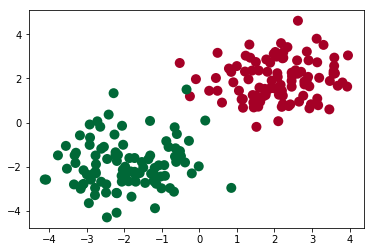

In [46]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)  #0标签
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)   #1标签
#print 'x0',
#print x0.size()  #(100L,2L)
#print 'x1',y0
 
x = torch.cat((x0,x1),dim=0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)
#print 'x:',x
#print 'y:',y
print (x.size())
print (y.size())
x,y = Variable(x),Variable(y)
 
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

In [43]:
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature,n_hidden)
        self.out = nn.Linear(n_hidden,n_output)
 
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
 
net = Net(2,10,2)
print (net)

torch.Size([200, 2])
torch.Size([200])
Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
#训练网络
optimizer = torch.optim.SGD(net.parameters(),lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()
 
# for i in range(100):
#     out = net(x)
#     loss = loss_func(out,y)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
 
#可视化训练过程
plt.ion()
plt.show()
for i in range(100):
    out = net(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if i % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y==target_y)/200
        plt.text(1.5,-4,'Accuracy=%.2f'%accuracy,fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
 
plt.ioff()
plt.show()

# torch.max

In [59]:
import torch
from torch.autograd import Variable
 
#返回输入tensor中所有元素的最大值
a = torch.randn(1, 3)
print (a)
print (torch.max(a))
print ('--' * 10)
 
#按维度dim 返回最大值  torch.max)(a,0) 返回每一列中最大值的那个元素，且返回索引（返回最大元素在这一列的行索引）
b = torch.randn(3,3)
b = Variable(b)
print (b)
print (torch.max(b,0))
print ('--' * 10)
 
#torch.max(a,1) 返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引）
print (torch.max(b,1))
 
print ('----' * 10)
print (torch.max(b,1)[0])   #只返回最大值
 
print ('----' * 10)
print (torch.max(b,1)[1])   #只返回最大值所在的索引

tensor([[-0.1955, -0.9656,  0.4224]])
tensor(0.4224)
--------------------
tensor([[ 0.2673, -0.4212, -0.5107],
        [-1.5727, -0.1232,  3.5870],
        [-1.8313,  1.5987, -1.2770]])
torch.return_types.max(
values=tensor([0.2673, 1.5987, 3.5870]),
indices=tensor([0, 2, 1]))
--------------------
torch.return_types.max(
values=tensor([0.2673, 3.5870, 1.5987]),
indices=tensor([0, 2, 1]))
----------------------------------------
tensor([0.2673, 3.5870, 1.5987])
----------------------------------------
tensor([0, 2, 1])
